# PCA on MNIST Dataset followed by its visualization

## (1) PCA computation manually

In [80]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [51]:
df = pd.read_csv("digit_train.csv")

In [52]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df_x = df.drop(["label"], axis=1)
df_labels = df["label"]

In [54]:
df_x.shape

(42000, 784)

#### a) Compute standardization of data

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
standardized_scalar = StandardScaler()
standardized_data = standardized_scalar.fit_transform(df_x)
standardized_data.shape

(42000, 784)

#### b) Calculate covariance matrix S(dxd)

In [56]:
cov_matrix = np.matmul(standardized_data.T, standardized_data)
cov_matrix.shape

(784, 784)

#### c) Calculate Eigen values and eigen vectors

In [57]:
from scipy.linalg import eigh

In [58]:
lambdas, vectors = eigh(cov_matrix, eigvals=(782, 783))
vectors.shape

(784, 2)

In [59]:
vectors = vectors.T
vectors.shape

(2, 784)

#### d) Calculate unit vectors U1=V1 and new coordinates

In [60]:
new_coordinates = np.matmul(vectors, standardized_data.T)
new_coordinates.shape

(2, 42000)

In [61]:
new_coordinates = np.vstack((new_coordinates, df_labels)).T

In [62]:
df_new = pd.DataFrame(new_coordinates, columns=["f1", "f2", "labels"])
df_new.head()

,f1,f2,labels
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


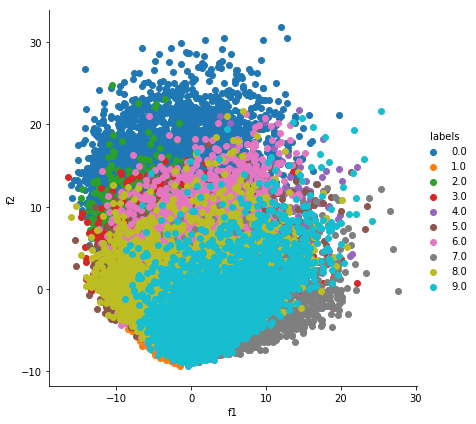

In [64]:
sns.FacetGrid(df_new, hue="labels", size=6).map(plt.scatter, "f1", "f2").add_legend()
plt.show()

## (2) PCA using Sci-kit library

In [75]:
from sklearn import decomposition

In [76]:
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)
pca_data.shape

(42000, 2)

In [77]:
pca_data = np.vstack((pca_data.T, df_labels)).T

In [78]:
df_PCA = pd.DataFrame(new_coordinates, columns=["f1", "f2", "labels"])
df_PCA.head()

,f1,f2,labels
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


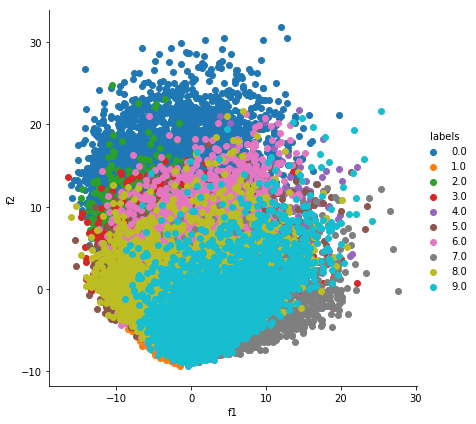

In [79]:
sns.FacetGrid(df_new, hue="labels", size=6).map(plt.scatter, "f1", "f2").add_legend()
plt.show()